In [1]:
import pandas as pd
from catboost import CatBoostClassifier
from catboost import Pool
import shap
import matplotlib.pyplot as pl
import matplotlib
from matplotlib.ticker import NullLocator
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score

In [2]:
data = pd.read_csv("snow__quality_with_other_parametrs.csv", sep = ';', decimal = ',')

In [3]:
data = data[(data['Month']>=9) | (data['Month']<=5)]

In [4]:
new_data = data[((data['Year']==2005) & (data['Month']>1)) | (data['Year']>2005)]
old_data = data[(data['Year']<2005)]

In [5]:
X_new = new_data.drop(['Sn_quality', 'Date', 'Year', 'Day', 'Month'], axis=1)
y_new = new_data['Sn_quality']

In [6]:
# Тренировочная и валидационная выборки на данных, полученных с rp5
X_train, X_val, y_train, y_val = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

In [7]:
# Тестовая часть выборки - данные из Обнинска
X_test = old_data.drop(['Sn_quality', 'Date', 'Year', 'Day', "Month"], axis=1)
y_test = old_data['Sn_quality']

In [8]:
X_test.head()

,Tavg,Pr,Sn
0,-31.8,0.4,77.0
1,-25.6,0.7,77.0
2,-30.9,0.8,76.0
3,-20.7,0.7,76.0
4,-34.9,0.0,72.0


In [8]:

model_with_early_stop=CatBoostClassifier(
    eval_metric='AUC',
    iterations=200,
    random_seed=63,
    learning_rate=0.3,
    early_stopping_rounds=20)
model_with_early_stop.fit(
    X_train,y_train,
    eval_set=(X_val, y_val),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [12]:
# Оценка модели на валидационной выборке
from catboost.utils import get_roc_curve
import sklearn
from sklearn import metrics
from catboost.utils import get_roc_curve
import sklearn
from sklearn import metrics
import matplotlib.pyplot as plt



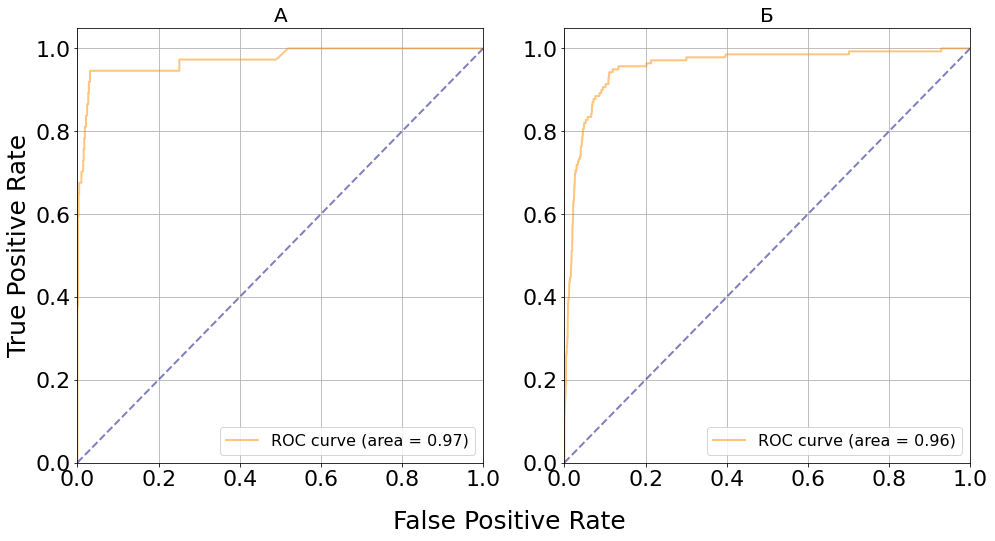

In [31]:
# оценка на валидационной выборке
plt.figure(figsize=(16, 8))
lw=2
plt.subplot(1, 2, 1)
eval_pool = Pool(X_val, y_val)
curve = get_roc_curve(model_with_early_stop, eval_pool)
(fpr, tpr, thresholds)=curve
roc_auc=sklearn.metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc, alpha=0.5)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', alpha=0.5)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.grid(True)
plt.ylabel('True Positive Rate', fontsize=25)
plt.title('A', fontsize=20)
plt.legend(loc="lower right", fontsize=16)



# оценка на тестовой  выборке
pl.subplot(1, 2, 2)
eval_pool = Pool(X_test, y_test )
curve = get_roc_curve(model_with_early_stop, eval_pool)
(fpr, tpr, thresholds)=curve
roc_auc=sklearn.metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc, alpha=0.5)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', alpha=0.5)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.grid(True)
plt.title('Б', fontsize=20)

plt.legend(loc="lower right", fontsize=16)
txt="False Positive Rate"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=25)
plt.savefig('total.png', format='png', dpi = 200)
plt.show()